In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#from google.colab import data_table
#data_table.enable_dataframe_formatter()
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from dataclasses import dataclass
from typing import Union
from math import ceil
ord_enc = OrdinalEncoder()

%matplotlib inline

# Rraw_data

Data in varaibles:
- All data `raw_data`
- Only complete data `strict_compelete_data`
- Complete Cabin, Age, Sex:

In [3]:
raw_data = pd.read_csv("../input/titanic/train.csv")
data_lables = raw_data.columns
print(data_lables)
raw_data

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#remove columns that are not revalent - price, embarked, ?cabin?, Ticket
filtered_data = raw_data
# remove all partial data from the dataset
for c in filtered_data.columns:
    filtered_data = filtered_data[filtered_data[c].notnull()]
filtered_data.to_csv('complete_data.csv')    
strict_compelete_data = filtered_data
strict_compelete_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [5]:
#remove columns that are not revalent - price, embarked, ?cabin?, Ticket
filtered_data = raw_data
# remove all partial data from the dataset
for c in ['Age','Sex', 'Cabin']:
    filtered_data = filtered_data[filtered_data[c].notnull()]
filtered_data.to_csv('complete_data.csv')    
cas_compelete_data = filtered_data
cas_compelete_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


# Define classes
The purpose of the classes is to determine teh varaibles of interest based on RandomForestClassifier 

In [6]:
@dataclass
class ForretSetup:
    criterion: str
    n_estimators: list
    name:str
    interest_col_names: list
    taget_col_name: str

In [7]:
class ForrestCompute:
    @staticmethod
    def compute(setup:ForretSetup, raw_data, step=5):
        tree = ForrestCompute(criterion=setup.criterion, 
                          n_estimators=setup.n_estimators, 
                          name=setup.name)
        tree.fit_based_interest(data=raw_data, 
                                interest_col_names=setup.interest_col_names, 
                                taget_col_name=setup.taget_col_name,step=step)
        return tree
    
    def __init__(self, criterion, n_estimators, name):
        self.name = name
        self.criterion=criterion
        if isinstance(n_estimators, int):
            self.n_estimators = [n_estimators, n_estimators + 1]
        else:
            self.n_estimators = n_estimators
            
        self.results = dict()        
        
        
    def fit_based_interest(self, data, interest_col_names, taget_col_name='Survived', step=5):
        #remove columns that are not revalent - price, embarked, ?cabin?, Ticket
        filtered_data = data[interest_col_names + [taget_col_name]]
        # remove all partial data from the dataset
        for c in filtered_data.columns:
            filtered_data = filtered_data[filtered_data[c].notnull()]
        # conver to numeric values

        domain_data=filtered_data[interest_col_names]  # Features
        for c in interest_col_names:
            domain_data.loc[:, c] = ord_enc.fit_transform(domain_data[[c]])
        # get value to predict
        target = filtered_data[taget_col_name]  # Labels        
        # Split dataset into training set and test set
        X_train, X_test, y_train, y_test = train_test_split(domain_data, target, test_size=0.3)
        #build predict based n_estimator range
        for i in range(self.n_estimators[0], self.n_estimators[1], step):
            forrest = RandomForestClassifier(n_estimators=i, criterion=self.criterion, oob_score=True, n_jobs=2)
            forrest.fit(X_train, y_train)
            y_pred=forrest.predict(X_test)
            # investigate importiant features
            feature_imp = pd.Series(forrest.feature_importances_,index=interest_col_names).sort_values(ascending=False)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            #print("Accuracy:", accuracy) 
            #print("OOB error ", 1 - forrest.oob_score_)
            self.results.update(
                {
                    i:{
                        'accuracy':accuracy ,
                        "name": '_'.join(interest_col_names),
                        "oob_error": 1 - forrest.oob_score_,
                        'features':feature_imp
                    }
                }
            )
            
    def get_oob_errors(self):
        est_key = self.results.keys()
        index = 0
        x_data = list()
        oob_error = list()
        
        for i in est_key:                        
            x_data.append(i)
            oob_error.append(self.results[i]['oob_error'])
            index = index + 1
                      
        return {
            'x':x_data,
            'oob_error': oob_error
        }
    def get_accuracy(self):
        est_key = self.results.keys()
        index = 0
        x_data = list()
        oob_error = list()
        
        for i in est_key:                        
            x_data.append(i)
            oob_error.append(self.results[i]['accuracy'])
            index = index + 1
                      
        return {
            'x':x_data,
            'accuracy': oob_error
        }
    def get_features(self):
        est_key = self.results.keys()
        i = [i for i in est_key]
        i = i[len(i) - 1]
        feature_imp = self.results[i]['features']
        return feature_imp
    
    def plot_data(self, out_filenname=None):
        sns.set(font_scale=1)
        est_key = self.results.keys()
        index = 0
        x_data = list()
        oob_error = list()
        
        for i in est_key:                        
            x_data.append(i)
            oob_error.append(self.results[i]['oob_error'])
            index = index + 1
                
        i = [i for i in est_key]
        i = i[len(i) - 1]
        feature_imp = self.results[i]['features']
        
        sns.barplot(x=feature_imp, y=feature_imp.index)

        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features, n_estimate {}".format(i))
        plt.legend()
        plt.show()
                        
        plt.plot(x_data, oob_error)
        plt.legend()
        plt.title('OBB error')
        plt.show()
        

        

In [8]:
class ForrestInvestigte:
    def __init__(self, criterion:Union[list,str], tree_size:list, interest_columns:list, target_column:str, step:int):
        if isinstance(criterion, str):
            criterion = [criterion]
        self.setup_lst = [
            ForretSetup(
            crit, tree_size, 'name',
            sorted(interest), target_column)
            for crit in criterion for interest in interest_columns
        ]
        self.step = step
        self.results = dict()
        for crit in criterion:
            self.results.update({crit:list()})
        
    def compute(self, raw_data):
        for setup in self.setup_lst:
            tree = ForrestCompute.compute(setup, raw_data, step=self.step)
            #tree.plot_data()
            self.results[setup.criterion].append({'tree':tree, 'setup':setup})
        for k in self.results:
            sorted(self.results[k], key=lambda x: len(x['setup'].interest_col_names))
        
    def plot(self):
        plt.clf() 
        max_rows = max([len(self.results[k]) for k in self.results.keys()])
        fig, axs = plt.subplots(2*max_rows, len(self.results.keys()), figsize=(40,10*2*max_rows))        
        crit_lst = list(self.results.keys())
        sns.set(font_scale=4)
        plt.rcParams.update({'font.size': 22})
        for c_index in range(len(crit_lst)):
            data_lst = self.results[crit_lst[c_index]]
            for index in range(len(data_lst)):
                data = data_lst[index]
                
                features = data['tree'].get_features()
                sns.barplot(x=features, y=features.index, ax=axs[2*index, c_index])
                axs[2*index, c_index].set_xlabel(
                    'Feature Importance Score, criteria\n {}'.format(data['setup'].criterion), 
                    size=40)
                
                error_data = data['tree'].get_accuracy()
                axs[2*index+1, c_index].plot(error_data['x'], error_data['accuracy'], label='Accuracy')
                error_data = data['tree'].get_oob_errors()
                axs[2*index+1, c_index].plot(error_data['x'], error_data['oob_error'], label='OOB Error')
                axs[2*index+1, c_index].set_xlabel(
                    'Goodness, criteria\n {}'.format(data['setup'].criterion), 
                    size=40)
                axs[2*index+1, c_index].grid(which='both')
                axs[2*index+1, c_index].legend()
                #axs[index, c_index].ylabel('Features')
                #axs[index, c_index].title("Visualizing Important Features, criteria {}, n_estimate {}".format(data['setup'].criterion,index))
        plt.tight_layout()
        plt.show()


# Computations
Use different view of the data set to perfom the needed computations

In [9]:
max_trees = 400
min_trees = 100


## All data

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<Figure size 432x288 with 0 Axes>

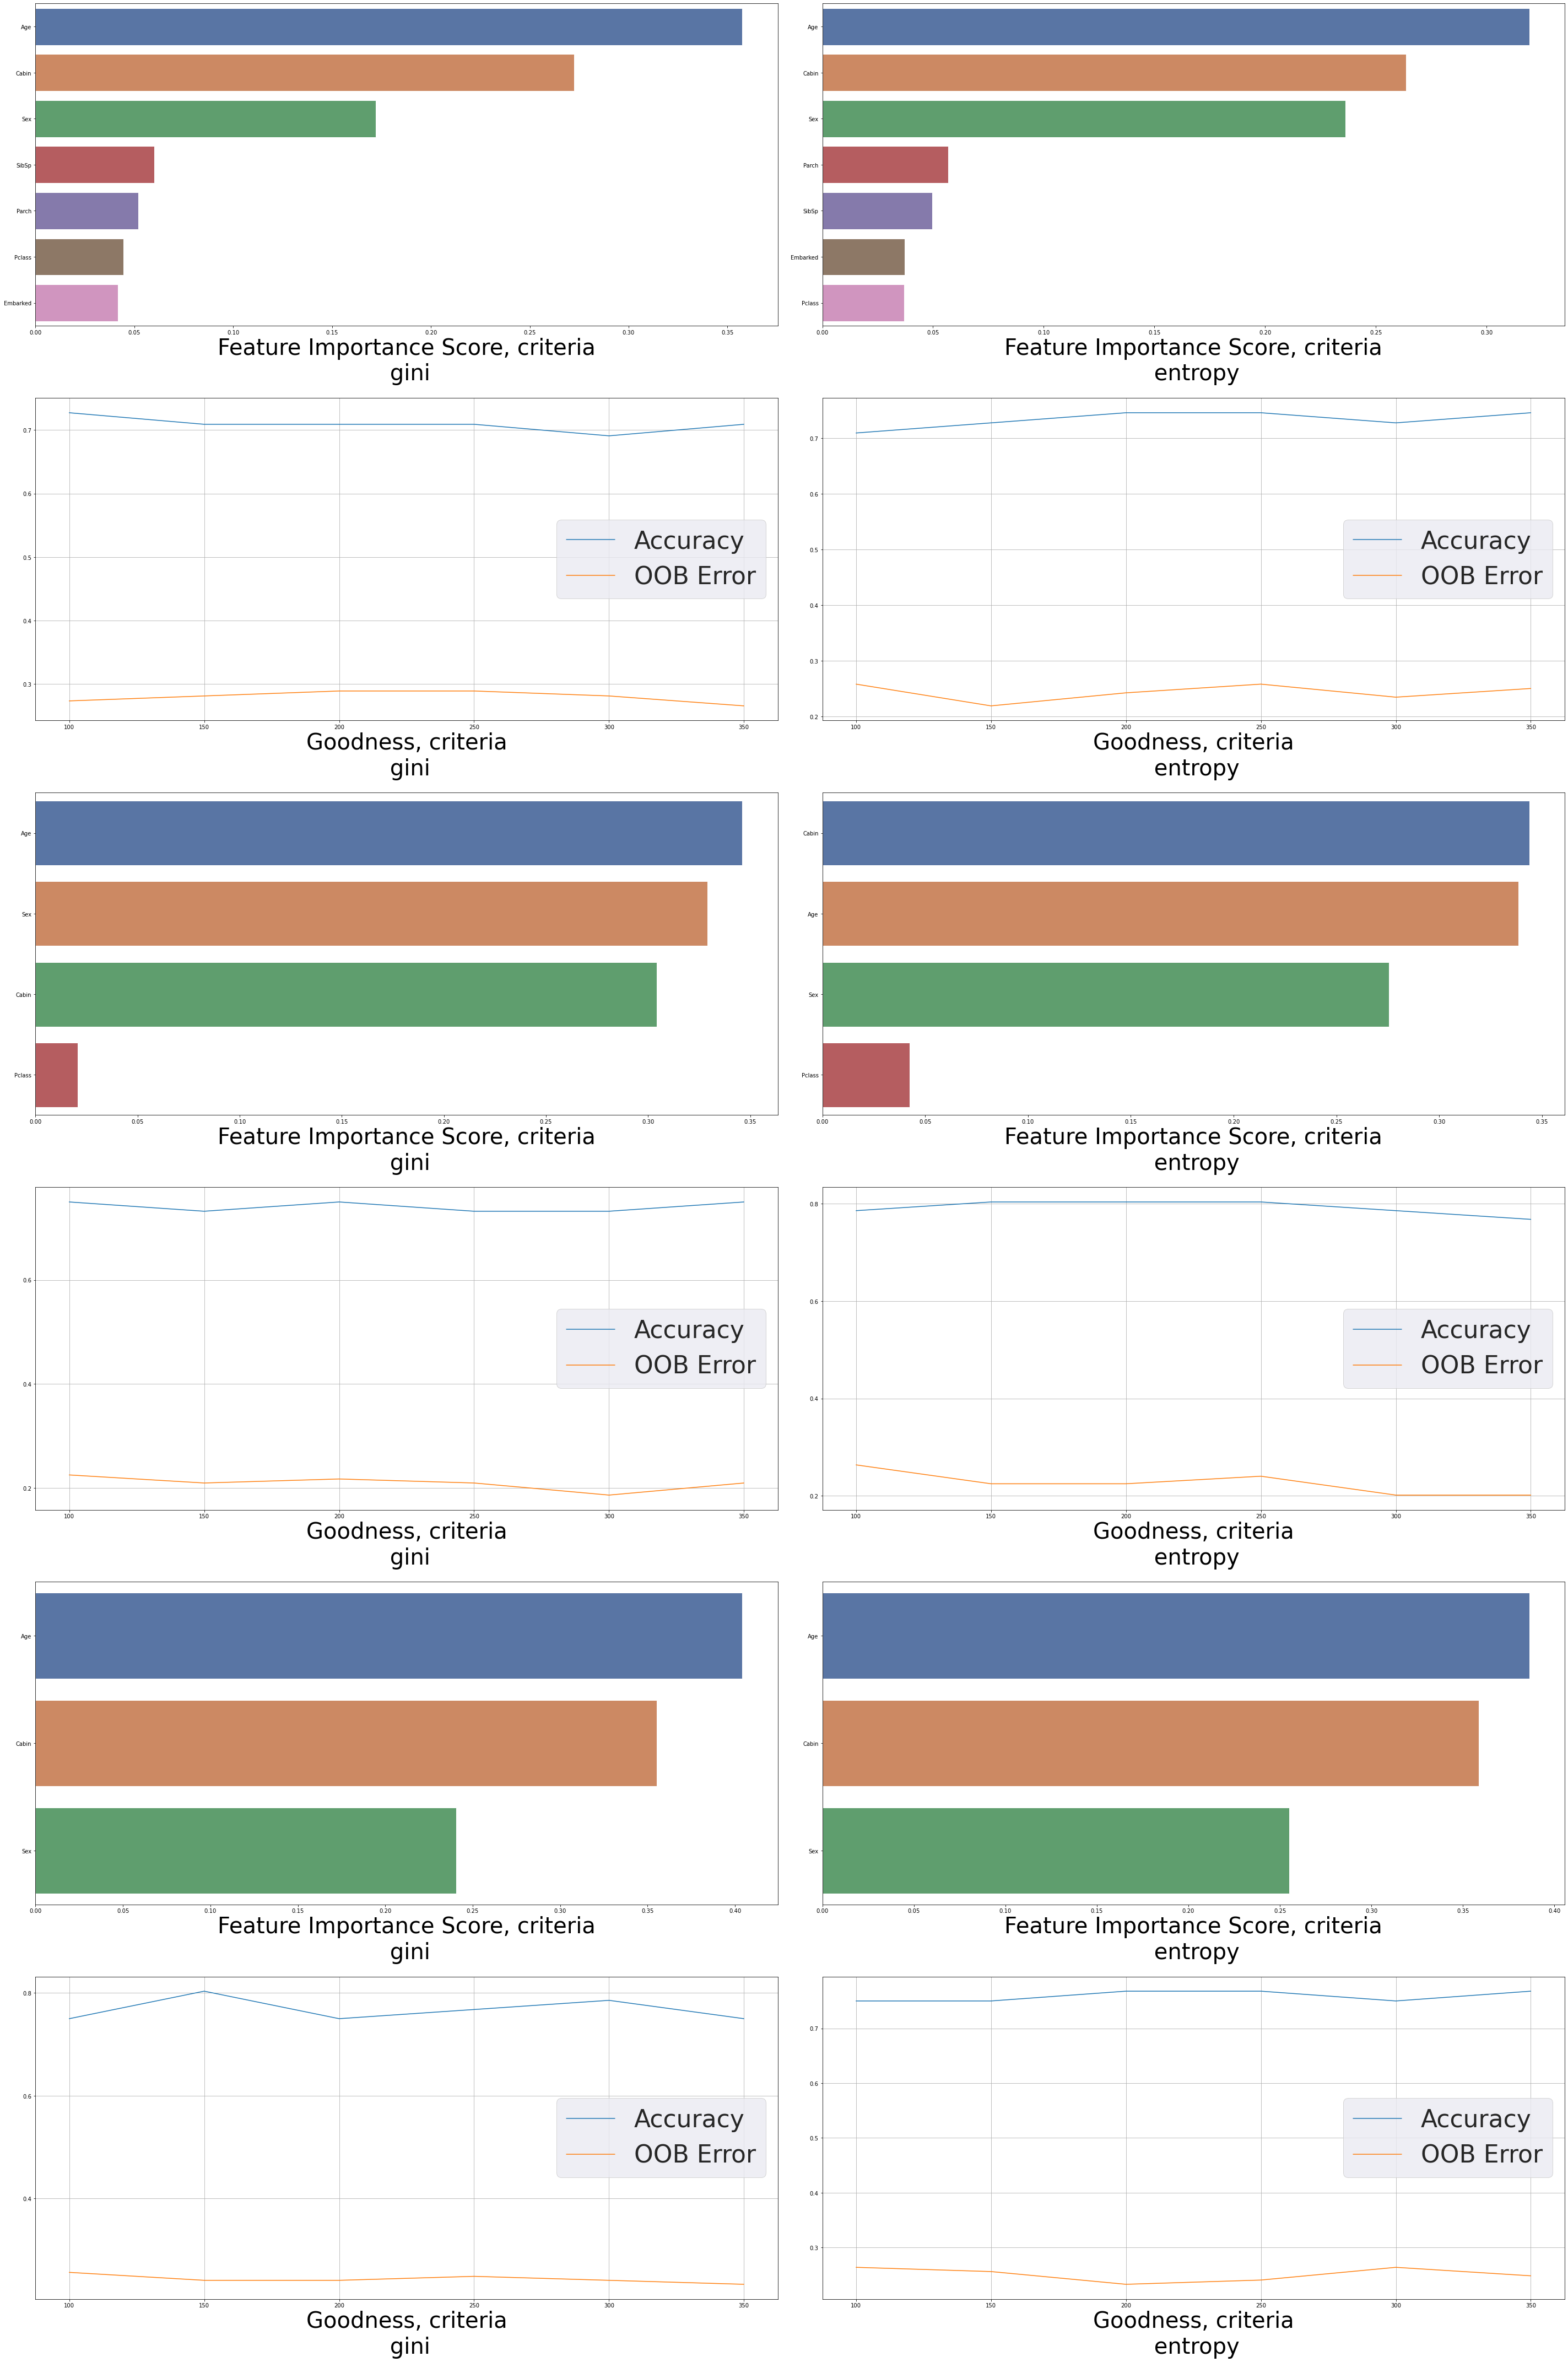

In [10]:
investigate = ForrestInvestigte(['gini','entropy'], 
                                [min_trees, max_trees],
                                [
                                    ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked'],
                                    ['Pclass', 'Sex', 'Age', 'Cabin'],
                                    ['Sex', 'Age', 'Cabin']
                                ],
                                'Survived', 50)
investigate.compute(raw_data)
investigate.plot()

## Only complete data

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<Figure size 432x288 with 0 Axes>

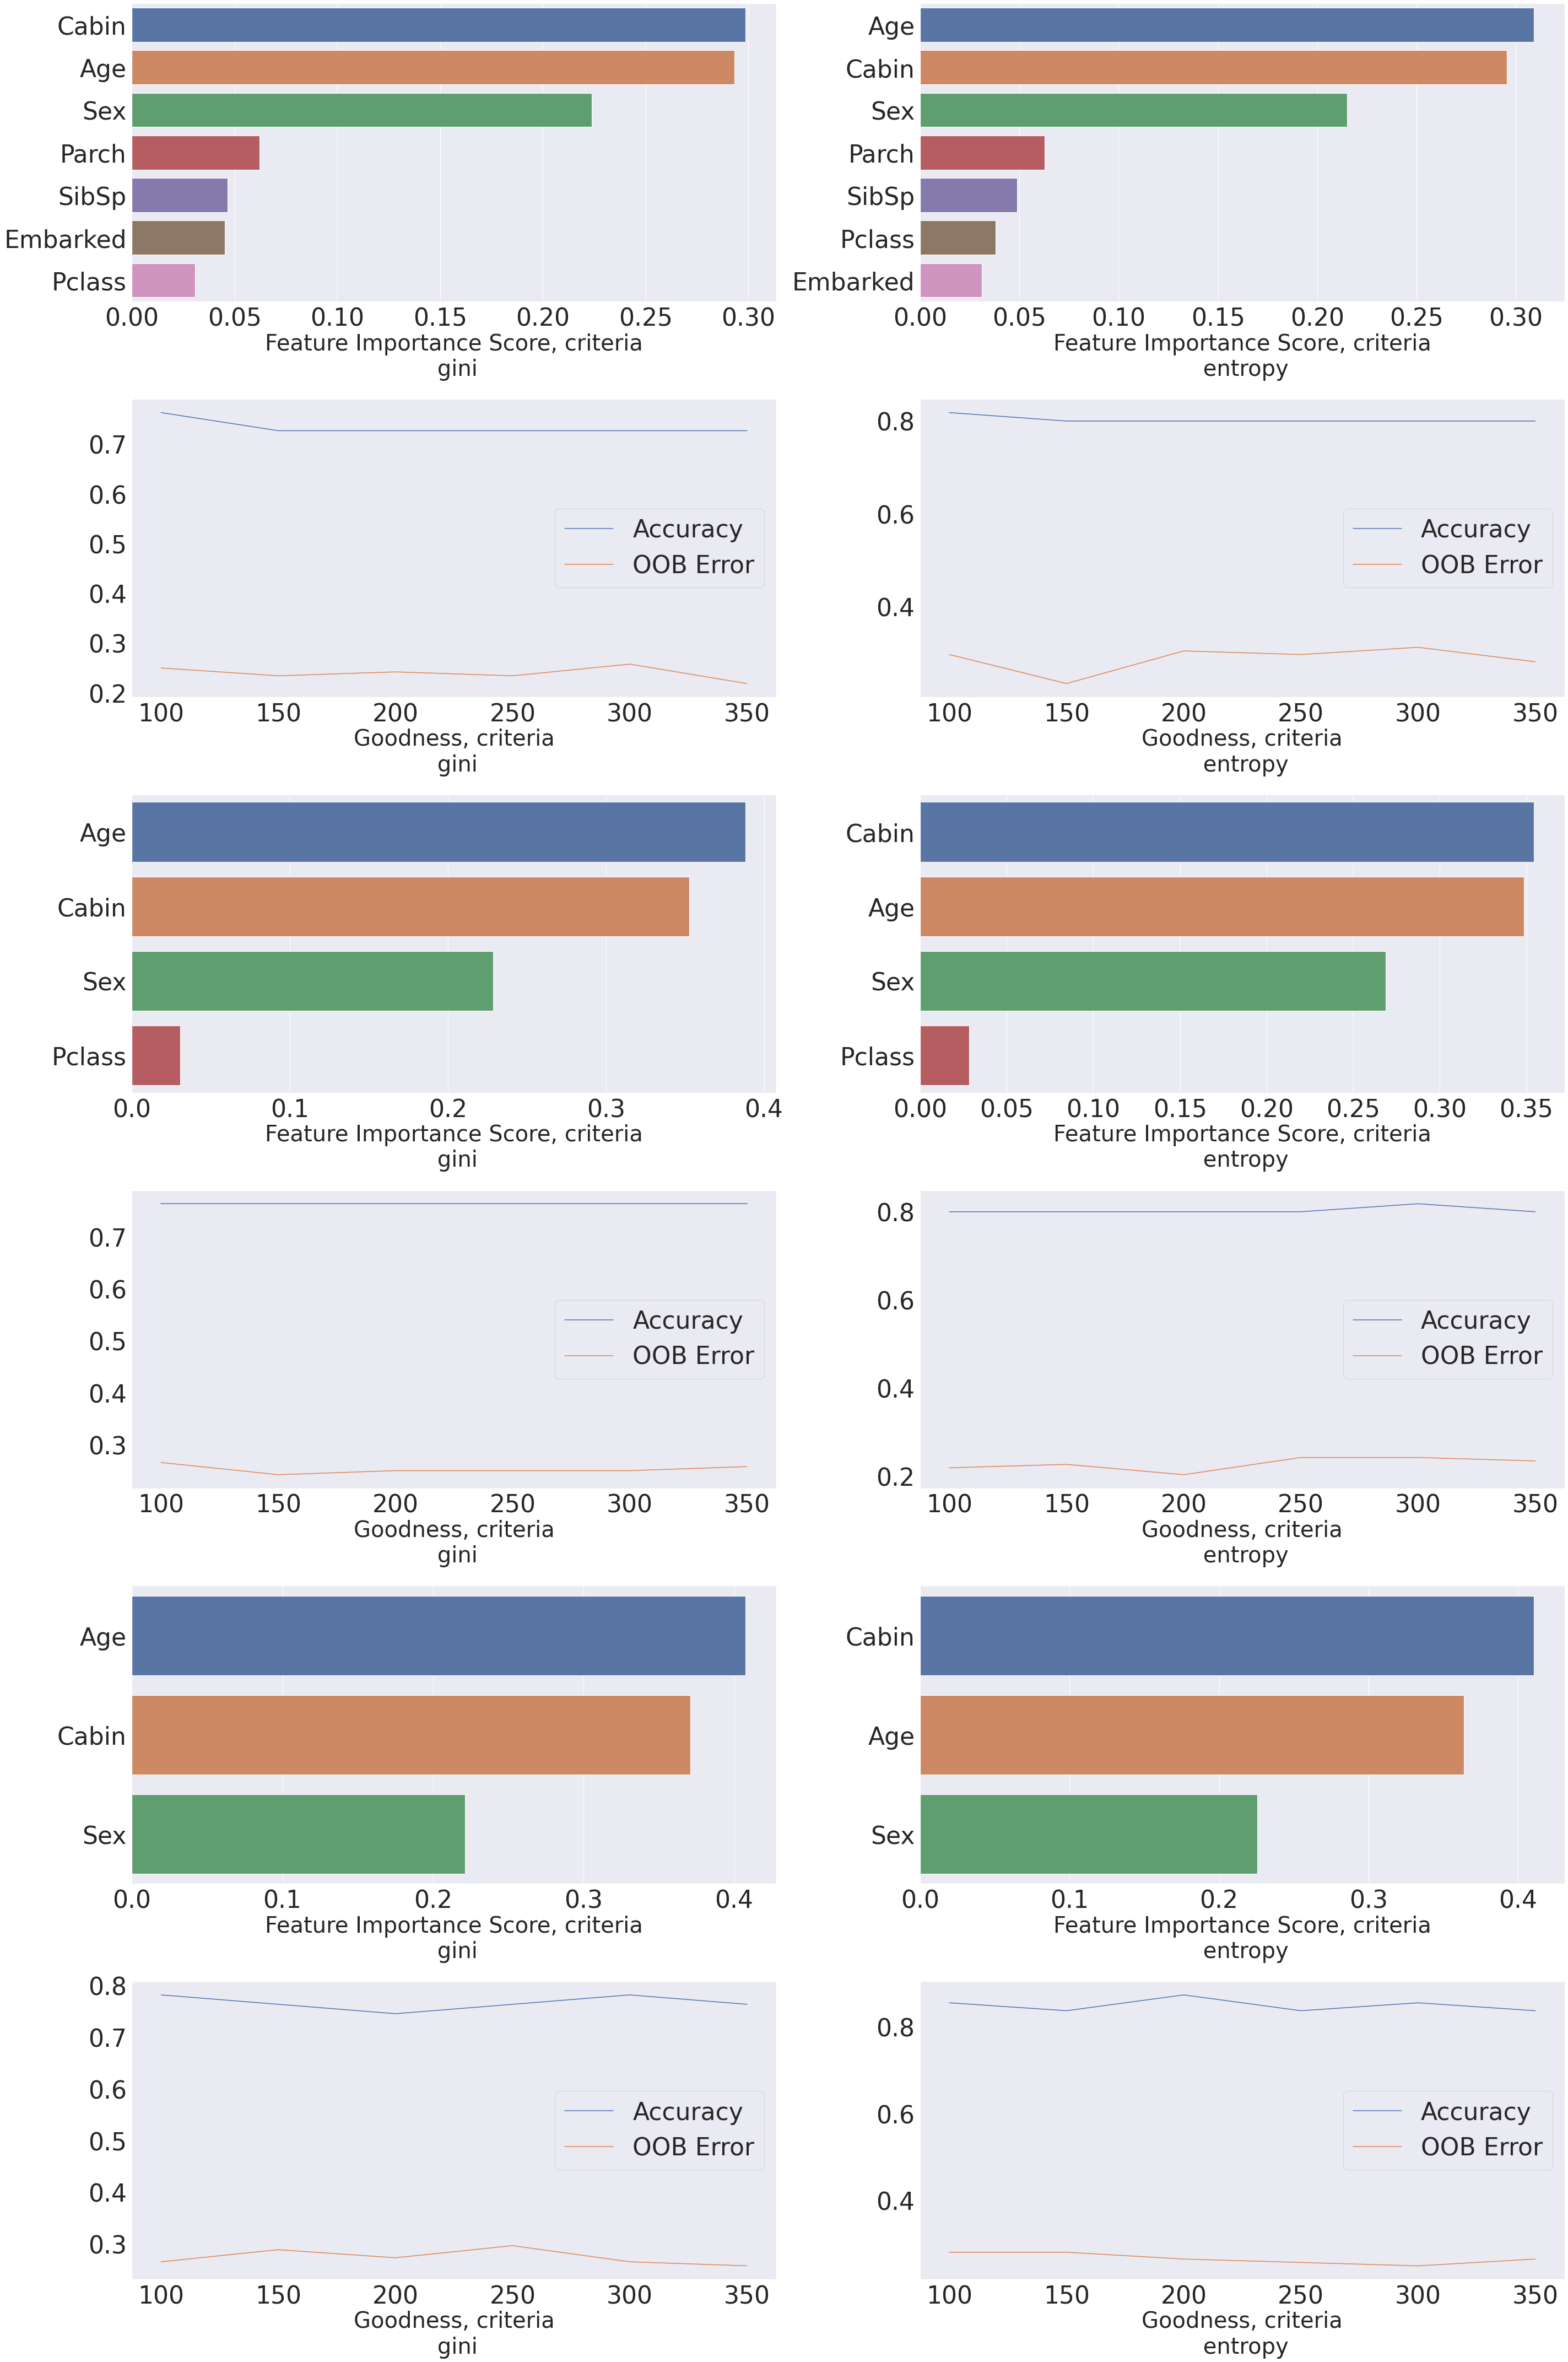

In [11]:
investigate = ForrestInvestigte(['gini','entropy'], 
                                [min_trees, max_trees],
                                [
                                    ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked'],
                                    ['Pclass', 'Sex', 'Age', 'Cabin'],
                                    ['Sex', 'Age', 'Cabin']
                                ],
                                'Survived', 50)
investigate.compute(strict_compelete_data)
investigate.plot()

## Complete Cabin, Age, Sex

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<Figure size 432x288 with 0 Axes>

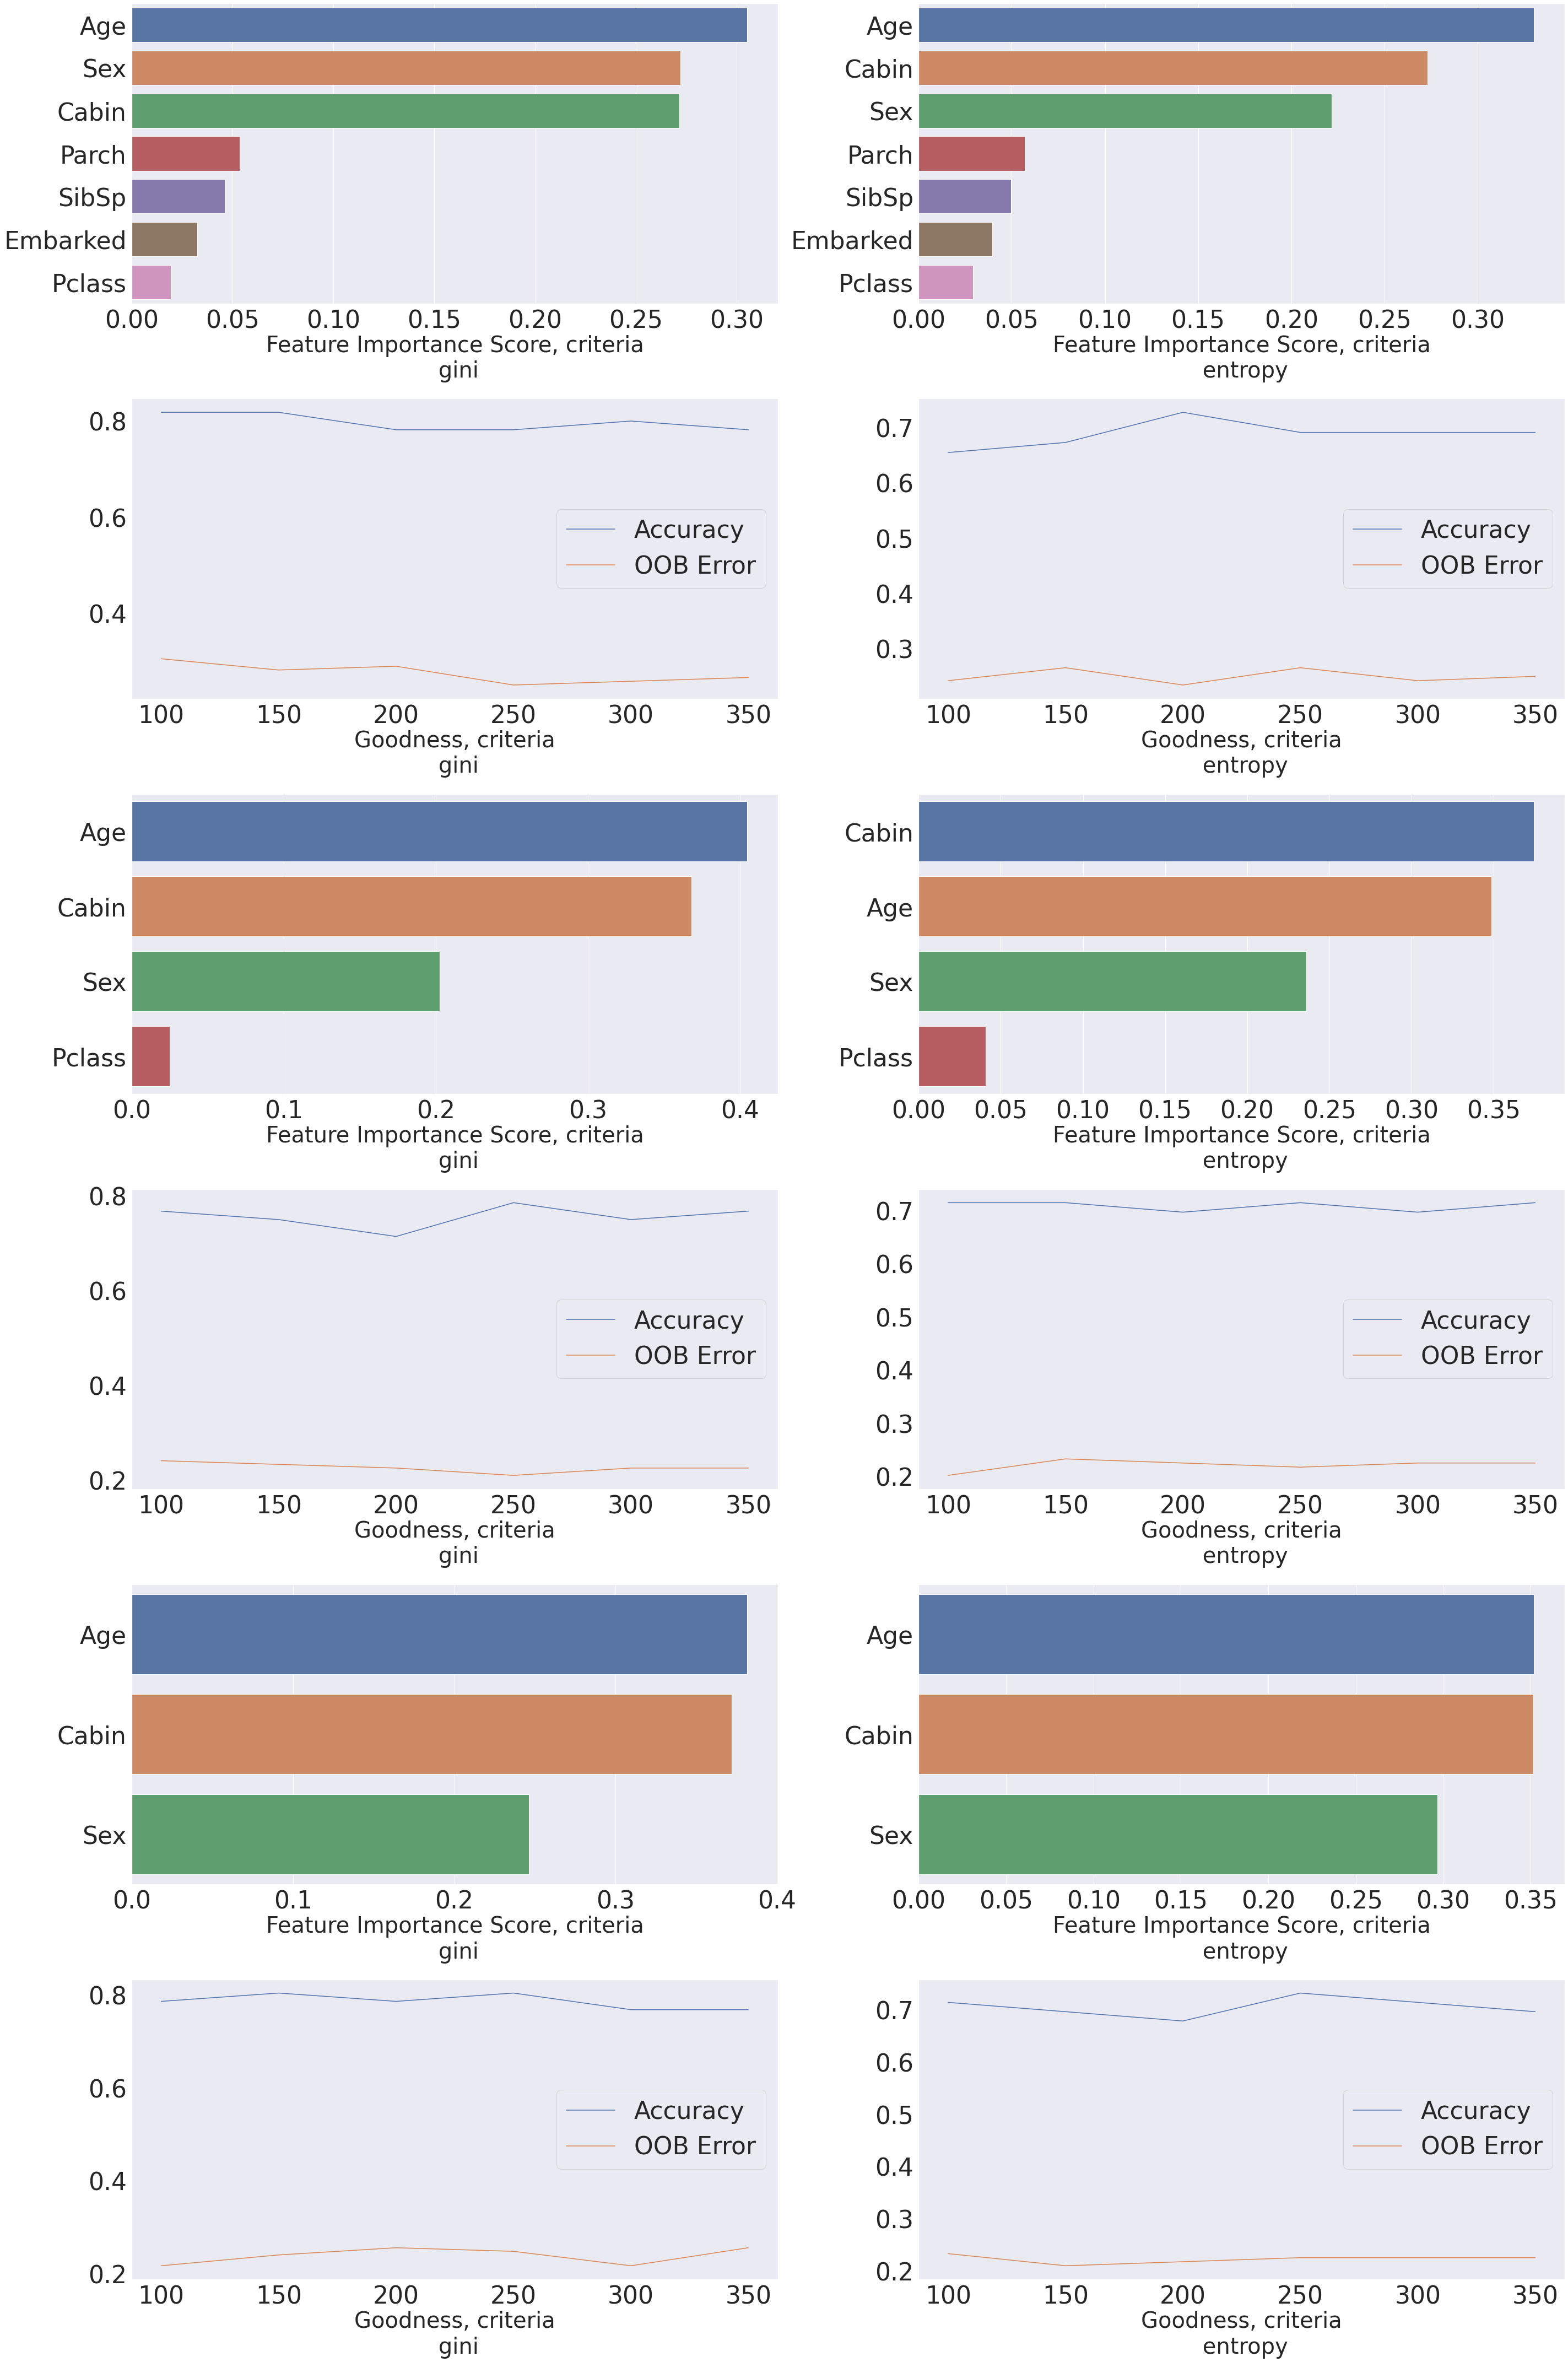

In [12]:
investigate = ForrestInvestigte(['gini','entropy'], 
                                [min_trees, max_trees],
                                [
                                    ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked'],
                                    ['Pclass', 'Sex', 'Age', 'Cabin'],
                                    ['Sex', 'Age', 'Cabin']
                                ],
                                'Survived', 50)
investigate.compute(cas_compelete_data)
investigate.plot()